In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('AcademicPerformance_New.csv')


In [3]:
dataset.head(5)

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,1.0,India,72.0,72.0,74.0,72.666667,C,Yes
1,2.0,Japan,69.0,90.0,NaN,53.000000,B,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,China,47.0,NaN,44.0,30.333333,D,Yes
4,5.0,India,76.0,78.0,NaN,51.333333,C,No


In [4]:
# dataset.isnull().sum()
# dataset.dtypes
dataset.describe()

,Roll No,WT,DSBDA,AI,Average
count,98.000000,91.000000,95.000000,89.000000,98.000000
mean,50.479592,61.164835,64.652632,62.235955,58.663265
std,28.469274,14.995009,14.893072,16.216590,16.518482
min,1.000000,18.000000,26.000000,20.000000,26.000000
25%,26.250000,51.000000,54.500000,52.000000,45.250000
50%,50.500000,63.000000,66.000000,63.000000,59.333333
75%,74.750000,71.000000,74.000000,74.000000,71.916667
max,99.000000,97.000000,95.000000,92.000000,91.666667


In [5]:
dataset['WT'] = dataset['WT'].fillna(dataset['WT'].median())


In [6]:
for i in dataset.columns:
    if dataset[i].dtypes == 'object':
        dataset[i] = dataset[i].fillna('0')
    else :
        dataset[i] = dataset[i].fillna(dataset[i].median())

print("Missing values handled successfully.")

Missing values handled successfully.


In [12]:
# # display the rows and the outliers in them

no_outliers = pd.DataFrame()

for col in dataset.columns:
    if dataset[col].dtype == 'float64' or dataset[col].dtype == 'int64':
        Q1 = dataset[col].quantile(0.25)
        Q3 = dataset[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        outliers = dataset[(dataset[col] < lower_limit) | (dataset[col] > upper_limit)]
        
        print(f"\nNumber of Outliers in {col}: {((dataset[col] < lower_limit) | (dataset[col] > upper_limit)).sum()}")
        print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
        
        print("Outliers is :\n",outliers[[col]])

        no_outliers[col] = dataset[(dataset[col] >= lower_limit) & (dataset[col] <= upper_limit)][col]
        print("Number of removed rows : ",len(outliers))

no_outliers.head()


Number of Outliers in Roll No: 0
Q1: 26.5, Q3: 74.5, IQR: 48.0
Outliers is :
 Empty DataFrame
Columns: [Roll No]
Index: []
Number of removed rows :  0

Number of Outliers in WT: 1
Q1: 53.0, Q3: 71.0, IQR: 18.0
Outliers is :
       WT
17  18.0
Number of removed rows :  1

Number of Outliers in DSBDA: 1
Q1: 55.0, Q3: 74.0, IQR: 19.0
Outliers is :
     DSBDA
76   26.0
Number of removed rows :  1

Number of Outliers in AI: 2
Q1: 54.0, Q3: 74.0, IQR: 20.0
Outliers is :
       AI
59  20.0
76  22.0
Number of removed rows :  2

Number of Outliers in Average: 0
Q1: 45.5, Q3: 71.83333333335, IQR: 26.333333333349998
Outliers is :
 Empty DataFrame
Columns: [Average]
Index: []
Number of removed rows :  0


,Roll No,WT,DSBDA,AI,Average
0,1.0,72.0,72.0,74.0,72.666667
1,2.0,69.0,90.0,63.0,53.000000
2,50.5,63.0,66.0,63.0,59.333333
3,4.0,47.0,66.0,44.0,30.333333
4,5.0,76.0,78.0,63.0,51.333333


In [14]:
wt_min = no_outliers['WT'].min()
dsbda_min = no_outliers['DSBDA'].min()
ai_min = no_outliers['AI'].min()

wt_max = no_outliers['WT'].max()
dsbda_max = no_outliers['DSBDA'].max()
ai_max = no_outliers['AI'].max()

wt_mean = round(no_outliers['WT'].mean(),2)
dsbda_mean = round(no_outliers['DSBDA'].mean(),2)
ai_mean = round(no_outliers['AI'].mean(),2)

print(f"The minimum values are \n WT : {wt_min}\n DSBDA : {dsbda_min}\n AI : {ai_min}")
print(f"\nThe maximum values are \n WT : {wt_max}\n DSBDA : {dsbda_max}\n AI : {ai_max}")
print(f"\nThe Averages values are \n WT : {wt_mean}\n DSBDA : {dsbda_mean}\n AI : {ai_mean}")


The minimum values are 
 WT : 27.0
 DSBDA : 32.0
 AI : 28.0

The maximum values are 
 WT : 97.0
 DSBDA : 95.0
 AI : 92.0

The Averages values are 
 WT : 61.76
 DSBDA : 65.1
 AI : 63.16


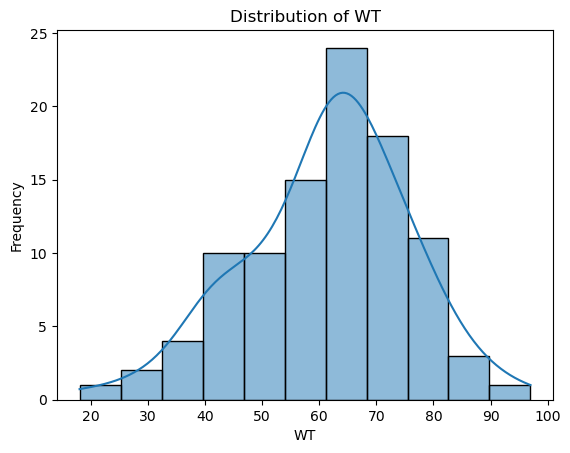

In [18]:
sns.histplot(dataset['WT'], kde=True)  # Replace 'WT' with your column name
plt.title('Distribution of WT')
plt.xlabel('WT')
plt.ylabel('Frequency')
plt.show()